Name: Dwi Fitria Astari Lubis

Credit Card Transactions Fraud Detection

Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate.

About the dataset
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.
This was generated using Sparkov Data Generation | Github tool created by Brandon Harris.


In [2]:
#Data Wrangling
import pandas as pd
import numpy as np
import datetime as dt

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Statistics / Logistic Regression 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy import stats

#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, cohen_kappa_score, roc_auc_score

#Model turning
from sklearn.model_selection import GridSearchCV

#Train by using Desicion Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


RANDOM_STATE=42
%matplotlib inline


In [3]:
#Load Dataset & Data Preprocessing
a = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\CODSOFT\\CODSOFT\\2. Credit Card Transactions Fraud Detection Dataset\\fraudTrain.csv")
b = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\CODSOFT\\CODSOFT\\2. Credit Card Transactions Fraud Detection Dataset\\fraudTest.csv")

In [4]:
#EDA (Exploratory Data Analysis)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

Key Features:
Unnamed: 0                  = Unique identifier for each transaction           
 1   trans_date_trans_time  = date and time of transaction
 2   cc_num                 = credit card number    
 3   merchant               = place where the person purchase using credit card
 4   category               = category of purchase
 5   amt                    = the transaction amount
 6   first                  = first name credit card owner
 7   last                   = last name credit card owner
 8   gender                 = gender owner of credit card
 9   street                 = location of credit card owner
 10  city                   = location of credit card owner
 11  state                  = location of credit card owner
 12  zip                    = location of credit card owner 
 13  lat                    = (latitude) location of owner
 14  long                   = (longitudinal) location of owner
 15  city_pop               = population of the city
 16  job                    = job of owner if the city
 17  dob                    = birthday of credit owner
 18  trans_num              = unique number of transaction
 19  unix_time              = unique number of time
 20  merch_lat              = (latitude) location of the merchant
 21  merch_long             = (longitudinal) location of the merchant
 22  is_fraud               = Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [5]:
a.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
b.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,year_dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,home_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497,Mechanical engineer,3/19/68,1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,home_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",1/17/90,1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",10/21/70,1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.8191,54767,Set designer,7/25/87,1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.0170,1126,Furniture designer,7/6/55,1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
#Check missing values
a.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

no missing value

In [8]:
#Check duplicate
# Find all duplicate rows (keeping the first occurrence as non-duplicate)
duplicates = a[a.duplicated(keep='first')]

# Print the duplicate rows
print(duplicates)

# To see how many duplicates there are:
print(f"Number of duplicate rows: {len(duplicates)}")

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]
Number of duplicate rows: 0


No duplicate

In [9]:
#Check for Other Potential Duplicates
#Same Card, Amount, Merchant (Different Time):  This could be a double billing or a sign of card testing.
suspicious_1 = a[a.duplicated(subset=['cc_num', 'amt', 'merchant'], keep=False)]  # keep=False to see ALL duplicates
print("Suspicious - Same Card, Amount, Merchant:")
print(suspicious_1)
print(f"Count: {len(suspicious_1)}")

Suspicious - Same Card, Amount, Merchant:
         Unnamed: 0 trans_date_trans_time        cc_num  \
1139           1139        1/1/2019 13:46  4.908850e+15   
2079           2079        1/1/2019 21:14  6.304520e+11   
2818           2818        1/2/2019 10:59  2.291160e+15   
4102           4102        1/3/2019 13:31  4.837000e+15   
4421           4421        1/3/2019 18:40  3.462730e+14   
...             ...                   ...           ...   
1040760     1040760         3/8/2020 0:47  3.562260e+15   
1044652     1044652        3/9/2020 12:05  3.739050e+14   
1045935     1045935        3/9/2020 19:25  2.264940e+15   
1045987     1045987        3/9/2020 19:40  4.537000e+18   
1048249     1048249       3/10/2020 14:11  3.521420e+15   

                                    merchant   category     amt    first  \
1139                    fraud_White and Sons  home_care   14.13   Lauren   
2079                    fraud_Morissette PLC   shopping    1.40   Rachel   
2818                 

The 640 rows we identified represent transactions where a credit card (cc_num) was used at the same merchant for the same amount (amt), but at different times. This could be perfectly legitimate behavior (e.g., someone making multiple purchases at the same store), but it's also a common pattern for card testing or other fraudulent activities.

The histograms show a wide variety of distributions across the numerical features. Some are skewed, some are more uniform, and some appear to have multiple modes or peaks. This is important because it will influence the choice of feature engineering techniques and potentially the types of models that work best.

Several features hint at the presence of outliers (e.g., amt, city_pop). Outliers can significantly impact model performance, so we need to investigate and decide how to handle them (removal, transformation, or keeping them if they are genuine extreme values).

1. amt, city_pop has several extreme outliers, indicating transactions in very large cities. we need to decide how to handle the outliers and consider a log transformation to reduce the skewness.
2. lat (Latitude) and long (Longitude), merch_lat (Merchant Latitude) and merch_long (Merchant Longitude) are Geographic Patterns. These suggest that transactions are clustered geographically, which is very important information for fraud detection.We can use latitude and longitude to create new features, such as distance from the cardholder's home or work location, or use clustering algorithms to group transactions by geographic region. conclusion: Create new features from lat, long, merch_lat, and merch_long (distances, clusters)
3. unix_time needs to be converted into more meaningful time-based features (hour of day, day of week, month, etc.) to capture any time-related patterns in fraudulent activity.
4. treat zip as categorical variable.


In [10]:
# Check the data type of the column
if a['trans_date_trans_time'].dtype != 'datetime64[ns]':
    # Convert to datetime if necessary
    a['trans_date_trans_time'] = pd.to_datetime(a['trans_date_trans_time'])

# Convert Extract date and time
a['date'] = a['trans_date_trans_time'].dt.date
a['time'] = a['trans_date_trans_time'].dt.time

a['transaction_hour'] = a['trans_date_trans_time'].dt.hour
a['year_month'] = a['trans_date_trans_time'].dt.to_period('M')
a['day_of_week'] = a['trans_date_trans_time'].dt.dayofweek

# Convert dob
a['dob'] = pd.to_datetime(a['dob'], format='%m/%d/%Y')

# Convert unix_time
a['unix_time'] = pd.to_datetime(a['unix_time'], unit='s')

# extract features from dob and unix_time:
a['dob_year'] = a['dob'].dt.year
a['dob_month'] = a['dob'].dt.month
a['dob_day'] = a['dob'].dt.day
a['unix_time_year'] = a['unix_time'].dt.year
a['unix_time_month'] = a['unix_time'].dt.month
a['unix_time_day'] = a['unix_time'].dt.day
a['unix_time_hour'] = a['unix_time'].dt.hour

print(a[['date','time','transaction_hour','year_month','day_of_week' ,'dob', 'unix_time', 'dob_year', 'unix_time_year']].head())

         date      time  transaction_hour year_month  day_of_week        dob  \
0  2019-01-01  00:00:00                 0    2019-01            1 1988-03-09   
1  2019-01-01  00:00:00                 0    2019-01            1 1978-06-21   
2  2019-01-01  00:00:00                 0    2019-01            1 1962-01-19   
3  2019-01-01  00:01:00                 0    2019-01            1 1967-01-12   
4  2019-01-01  00:03:00                 0    2019-01            1 1986-03-28   

            unix_time  dob_year  unix_time_year  
0 2012-01-01 00:00:18      1988            2012  
1 2012-01-01 00:00:44      1978            2012  
2 2012-01-01 00:00:51      1962            2012  
3 2012-01-01 00:01:16      1967            2012  
4 2012-01-01 00:03:06      1986            2012  


In [11]:
#adding column age at transaction
def calculate_age_at_transaction(row):
    dob = row['dob']
    transaction_date = row['trans_date_trans_time'].date()  # Extract the date part
    return transaction_date.year - dob.year - ((transaction_date.month, transaction_date.day) < (dob.month, dob.day))

a['age_at_transaction'] = a.apply(calculate_age_at_transaction, axis=1)

print(a[['dob', 'trans_date_trans_time', 'age_at_transaction']].head())

         dob trans_date_trans_time  age_at_transaction
0 1988-03-09   2019-01-01 00:00:00                  30
1 1978-06-21   2019-01-01 00:00:00                  40
2 1962-01-19   2019-01-01 00:00:00                  56
3 1967-01-12   2019-01-01 00:01:00                  51
4 1986-03-28   2019-01-01 00:03:00                  32


In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 36 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1048575 non-null  int64         
 1   trans_date_trans_time  1048575 non-null  datetime64[ns]
 2   cc_num                 1048575 non-null  float64       
 3   merchant               1048575 non-null  object        
 4   category               1048575 non-null  object        
 5   amt                    1048575 non-null  float64       
 6   first                  1048575 non-null  object        
 7   last                   1048575 non-null  object        
 8   gender                 1048575 non-null  object        
 9   street                 1048575 non-null  object        
 10  city                   1048575 non-null  object        
 11  state                  1048575 non-null  object        
 12  zip                    10485

In [13]:
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age_at_transaction']

categorical_features = ['cc_num', 'merchant', 'category', 'city', 'state', 'zip', 'job'] # Removed first, last, trans_num

datetime_features = ['transaction_hour', 'year_month', 'day_of_week', 'dob_year', 'dob_month', 'dob_day', 
                     'unix_time_year', 'unix_time_month', 'unix_time_day', 'unix_time_hour','date','time']

# Features to drop (ID-like, original date/time, names)
features_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'dob', 'trans_num', 'first', 'last', 'street']



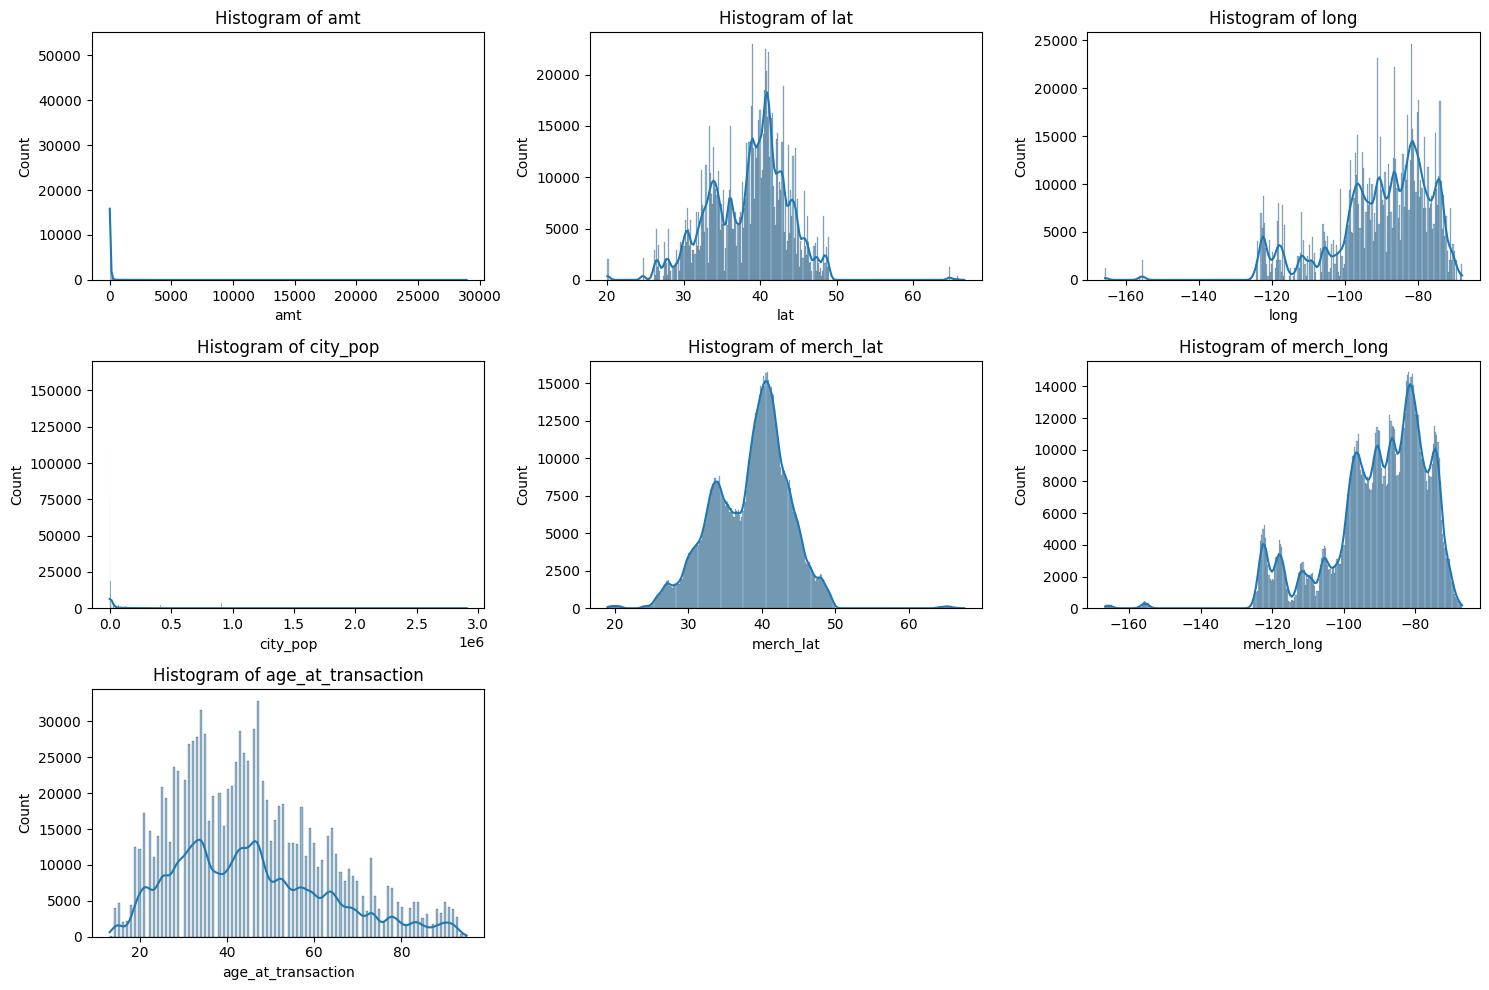

In [14]:
#1. Histograms for Numerical Features

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  
    sns.histplot(a[feature], kde=True) 
    plt.title(f'Histogram of {feature}')
    plt.tight_layout() 
plt.show()

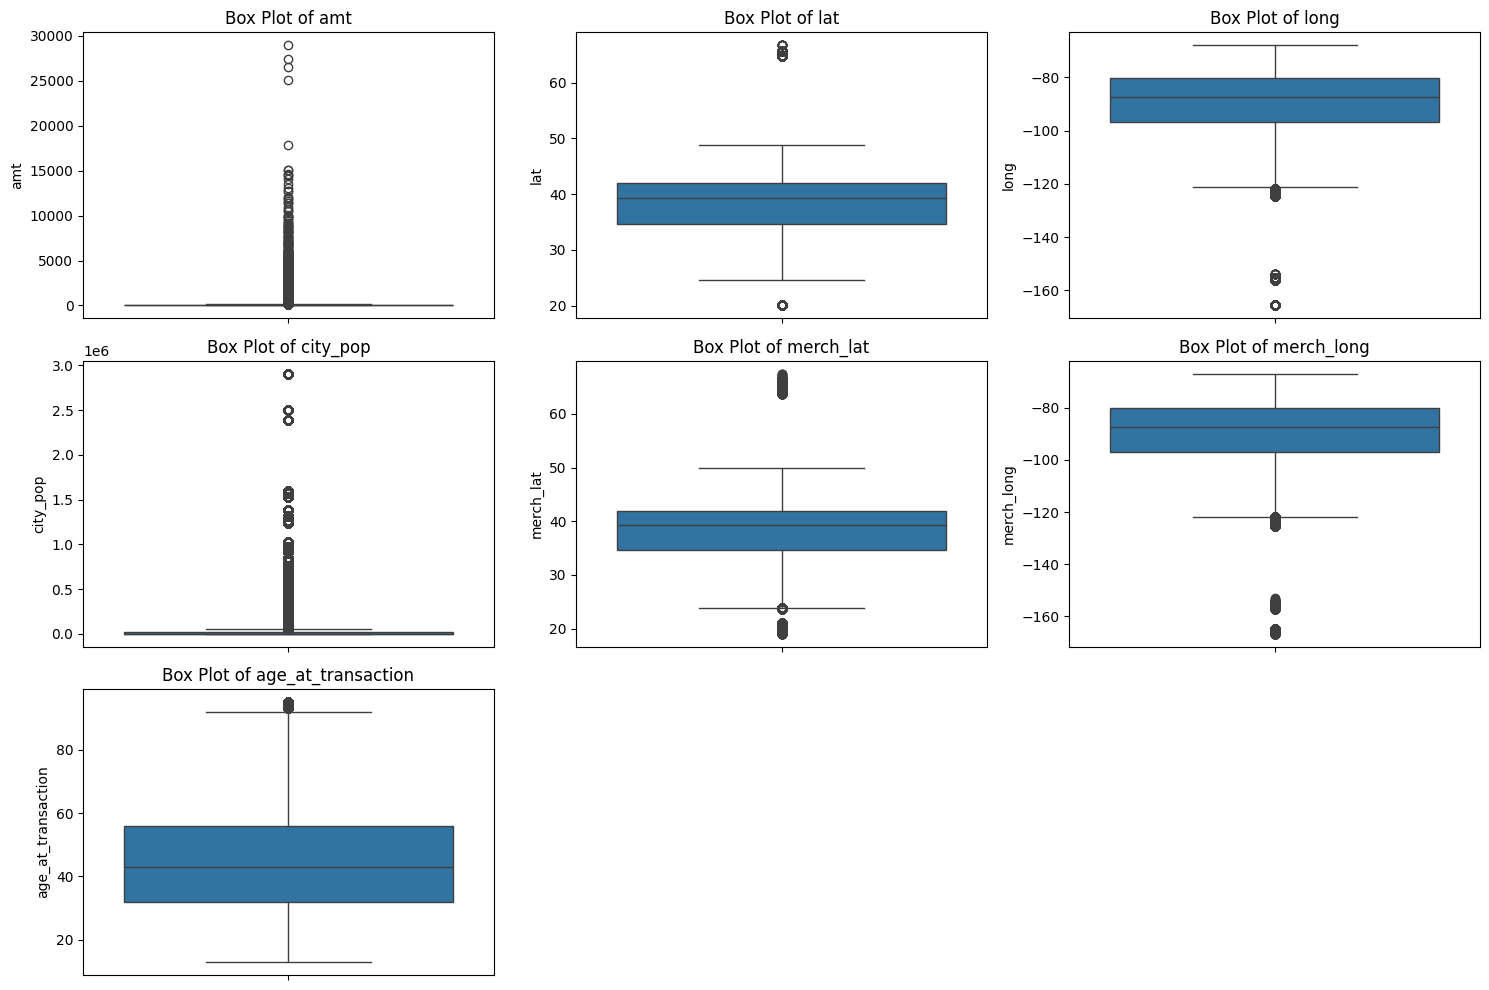

column: (0, 'amt')
  Upper Whisker: 193.165
  Lower Whisker: -100.475
column: (1, 'lat')
  Upper Whisker: 52.920249999999996
  Lower Whisker: 23.640650000000004
column: (2, 'long')
  Upper Whisker: -55.198
  Lower Whisker: -121.75800000000001
column: (3, 'city_pop')
  Upper Whisker: 49705.5
  Lower Whisker: -28634.5
column: (4, 'merch_lat')
  Upper Whisker: 52.79574375
  Lower Whisker: 23.889817750000002
column: (5, 'merch_long')
  Upper Whisker: -55.23273900000001
  Lower Whisker: -121.898179
column: (6, 'age_at_transaction')
  Upper Whisker: 92.0
  Lower Whisker: -4.0


In [15]:
# 2. Box Plots for Numerical Features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=a[feature]) # Boxplot on the y-axis
    plt.title(f'Box Plot of {feature}')
    plt.tight_layout()
plt.show()

for i, feature in enumerate(numerical_features):
  Q1 = a[feature].quantile(0.25)
  Q3 = a[feature].quantile(0.75)
  IQR = Q3 - Q1
  upper_whisker = Q3 + 1.5 * IQR
  lower_whisker = Q1 - 1.5 * IQR

  print(f'column: {i,feature}')
  print(f'  Upper Whisker: {upper_whisker}')
  print(f'  Lower Whisker: {lower_whisker}')

In [16]:
# Calculate descriptive statistics
description = a[numerical_features].describe()

# Print the statistics
print(description)

                amt           lat          long      city_pop     merch_lat  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   7.027910e+01  3.853336e+01 -9.022626e+01  8.905776e+04  3.853346e+01   
std    1.599518e+02  5.076852e+00  1.375858e+01  3.024351e+05  5.111233e+00   
min    1.000000e+00  2.002710e+01 -1.656723e+02  2.300000e+01  1.902779e+01   
25%    9.640000e+00  3.462050e+01 -9.679800e+01  7.430000e+02  3.472954e+01   
50%    4.745000e+01  3.935430e+01 -8.747690e+01  2.456000e+03  3.936295e+01   
75%    8.305000e+01  4.194040e+01 -8.015800e+01  2.032800e+04  4.195602e+01   
max    2.894890e+04  6.669330e+01 -6.795030e+01  2.906700e+06  6.751027e+01   

         merch_long  age_at_transaction  
count  1.048575e+06        1.048575e+06  
mean  -9.022648e+01        4.538840e+01  
std    1.377093e+01        1.738094e+01  
min   -1.666712e+02        1.300000e+01  
25%   -9.689864e+01        3.200000e+01  
50%   -8.743923e+01        4.300000e

Insights and observation for numerical_features:
1. amt (Transaction Amount): Many points are plotted as outliers above the upper whisker (193.17). This indicates a significant number of large transactions.The box plot confirms the high skewness observed earlier in the histogram. Consider how to handle these outliers. Log transformation might be useful to reduce the impact of the skewness.

2. lat (Latitude) and long (Longitude): These are best used for creating location-based features, like distance from a central point or clustering transactions geographically.

3. city_pop (City Population): The box plot confirms the high skewness. Consider how to handle the outliers and potential log transformation.

4. merch_lat (Merchant Latitude) and merch_long (Merchant Longitude): Use these similarly to customer location data for feature engineering.

5. age_at_transaction: The data seems to be within a reasonable age range.

Next step:
Outlier Handling: Decide how to handle the outliers, especially in amt and city_pop. Consider capping, winsorizing, or transformations.
Feature Engineering: Create new features based on location (lat, long, merch_lat, merch_long) and potentially time (if available).
Data Transformation: Consider log transformations for amt and city_pop to reduce skewness.
Domain Expertise: Use your knowledge of credit card transactions to guide your decisions. For example, are unusually large transactions at 3 AM more suspicious than large transactions during the day?
Iterate: Building a good model is an iterative process. Experiment with different techniques to find what works best.

In [17]:
#Outlier Handling
def handle_outliers(df, feature, method='clip', iqr_multiplier=1.5):
    """Handles outliers in a numerical feature.

    Args:
        df: Pandas DataFrame.
        feature: Name of the numerical feature.
        method: 'clip' (clipping to whiskers) or 'iqr' (IQR-based capping).
        iqr_multiplier: Multiplier for IQR method.

    Returns:
        Pandas Series with handled outliers.
    """

    data = df[feature]

    if method == 'clip':
        lower_bound = df[feature].quantile(0.25) - iqr_multiplier * (df[feature].quantile(0.75) - df[feature].quantile(0.25))
        upper_bound = df[feature].quantile(0.75) + iqr_multiplier * (df[feature].quantile(0.75) - df[feature].quantile(0.25))
        data_handled = np.clip(data, lower_bound, upper_bound) # clipping method
    elif method == 'iqr':
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        data_handled = np.where(data < lower_bound, lower_bound, np.where(data > upper_bound, upper_bound, data)) # iqr method
    else:
        raise ValueError("Invalid outlier handling method. Choose 'clip' or 'iqr'.")

    return data_handled

# Apply outlier handling to each numerical feature
for feature in numerical_features:
    a[feature] = handle_outliers(a, feature, method='clip', iqr_multiplier=1.5) 


In [18]:
# Verify the changes after handling outliers
print(a[numerical_features].describe())

                amt           lat          long      city_pop     merch_lat  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   5.781009e+01  3.852070e+01 -9.005897e+01  1.358808e+04  3.852106e+01   
std    5.309537e+01  4.973747e+00  1.317727e+01  1.917307e+04  5.006221e+00   
min    1.000000e+00  2.364065e+01 -1.217580e+02  2.300000e+01  2.388982e+01   
25%    9.640000e+00  3.462050e+01 -9.679800e+01  7.430000e+02  3.472954e+01   
50%    4.745000e+01  3.935430e+01 -8.747690e+01  2.456000e+03  3.936295e+01   
75%    8.305000e+01  4.194040e+01 -8.015800e+01  2.032800e+04  4.195602e+01   
max    1.931650e+02  5.292025e+01 -6.795030e+01  4.970550e+04  5.279574e+01   

         merch_long  age_at_transaction  
count  1.048575e+06        1.048575e+06  
mean  -9.006211e+01        4.538479e+01  
std    1.319680e+01        1.737112e+01  
min   -1.218982e+02        1.300000e+01  
25%   -9.689864e+01        3.200000e+01  
50%   -8.743923e+01        4.300000e

In [19]:
print(a['amt'].skew())
print(a['city_pop'].skew())

1.0622035427978627
1.1852062001700985


In [20]:
#Log Transformation for 'amt' and 'city_pop
a['amt'] = np.log1p(a['amt'])  # Apply log transformation (add 1 to avoid log(0))
a['city_pop'] = np.log1p(a['city_pop'])

# Verify the changes after log transformation
print(a[numerical_features].describe())


                amt           lat          long      city_pop     merch_lat  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   3.502907e+00  3.852070e+01 -9.005897e+01  8.065565e+00  3.852106e+01   
std    1.234301e+00  4.973747e+00  1.317727e+01  1.939368e+00  5.006221e+00   
min    6.931472e-01  2.364065e+01 -1.217580e+02  3.178054e+00  2.388982e+01   
25%    2.364620e+00  3.462050e+01 -9.679800e+01  6.612041e+00  3.472954e+01   
50%    3.880532e+00  3.935430e+01 -8.747690e+01  7.806696e+00  3.936295e+01   
75%    4.431412e+00  4.194040e+01 -8.015800e+01  9.919804e+00  4.195602e+01   
max    5.268708e+00  5.292025e+01 -6.795030e+01  1.081389e+01  5.279574e+01   

         merch_long  age_at_transaction  
count  1.048575e+06        1.048575e+06  
mean  -9.006211e+01        4.538479e+01  
std    1.319680e+01        1.737112e+01  
min   -1.218982e+02        1.300000e+01  
25%   -9.689864e+01        3.200000e+01  
50%   -8.743923e+01        4.300000e

In [21]:
#Feature based on location
from geopy.distance import geodesic  # For distance calculation

# 1. Distance from a Central Point (Customer Location)

# Define a central point (e.g., the mean of all latitudes and longitudes)
central_lat = a['lat'].mean()
central_long = a['long'].mean()
central_point = (central_lat, central_long)

# Calculate distance from the central point (using geodesic for accuracy)
a['distance_from_center'] = a.apply(lambda row: geodesic((row['lat'], row['long']), central_point).km, axis=1)
customer_location = a[['lat', 'long']].values
merchant_location = a[['merch_lat', 'merch_long']].values

# Combining Merchant Location (Distance between Customer and Merchant)
a['distance_customer_merchant'] = a.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).km, axis=1)



In [22]:
#2. Combine City, State, and Zip Code

# Create a combined location feature (e.g., as a string)
a['combined_location'] = a['city'].astype(str) + ', ' + a['state'].astype(str) + ' ' + a['zip'].astype(str)

print(a['combined_location'].value_counts())

combined_location
Naples, FL 34112           2931
Warren, MI 48088           2922
Lahoma, OK 73754           2905
Fort Washakie, WY 82514    2860
Bradley, SC 29819          2566
                           ... 
Claypool, IN 46510            7
Chattanooga, TN 37411         7
San Antonio, TX 78208         7
New York City, NY 10018       7
Karns City, PA 16041          7
Name: count, Length: 952, dtype: int64


In [23]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 39 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Unnamed: 0                  1048575 non-null  int64         
 1   trans_date_trans_time       1048575 non-null  datetime64[ns]
 2   cc_num                      1048575 non-null  float64       
 3   merchant                    1048575 non-null  object        
 4   category                    1048575 non-null  object        
 5   amt                         1048575 non-null  float64       
 6   first                       1048575 non-null  object        
 7   last                        1048575 non-null  object        
 8   gender                      1048575 non-null  object        
 9   street                      1048575 non-null  object        
 10  city                        1048575 non-null  object        
 11  state                   

In [24]:
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age_at_transaction', 'distance_from_center', 'distance_customer_merchant']

categorical_features = ['cc_num', 'merchant', 'category', 'city', 'state', 'zip', 'job', 'combined_location']  

# Date/Time features (Consider these as numerical or create more granular categorical features if needed)
datetime_features = ['transaction_hour', 'year_month', 'day_of_week', 'dob_year', 'dob_month', 'dob_day', 
                     'unix_time_year', 'unix_time_month', 'unix_time_day', 'unix_time_hour','date','time']

# Features to drop (ID-like, original date/time, names, street)
features_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'dob', 'trans_num', 'first', 'last', 'street']

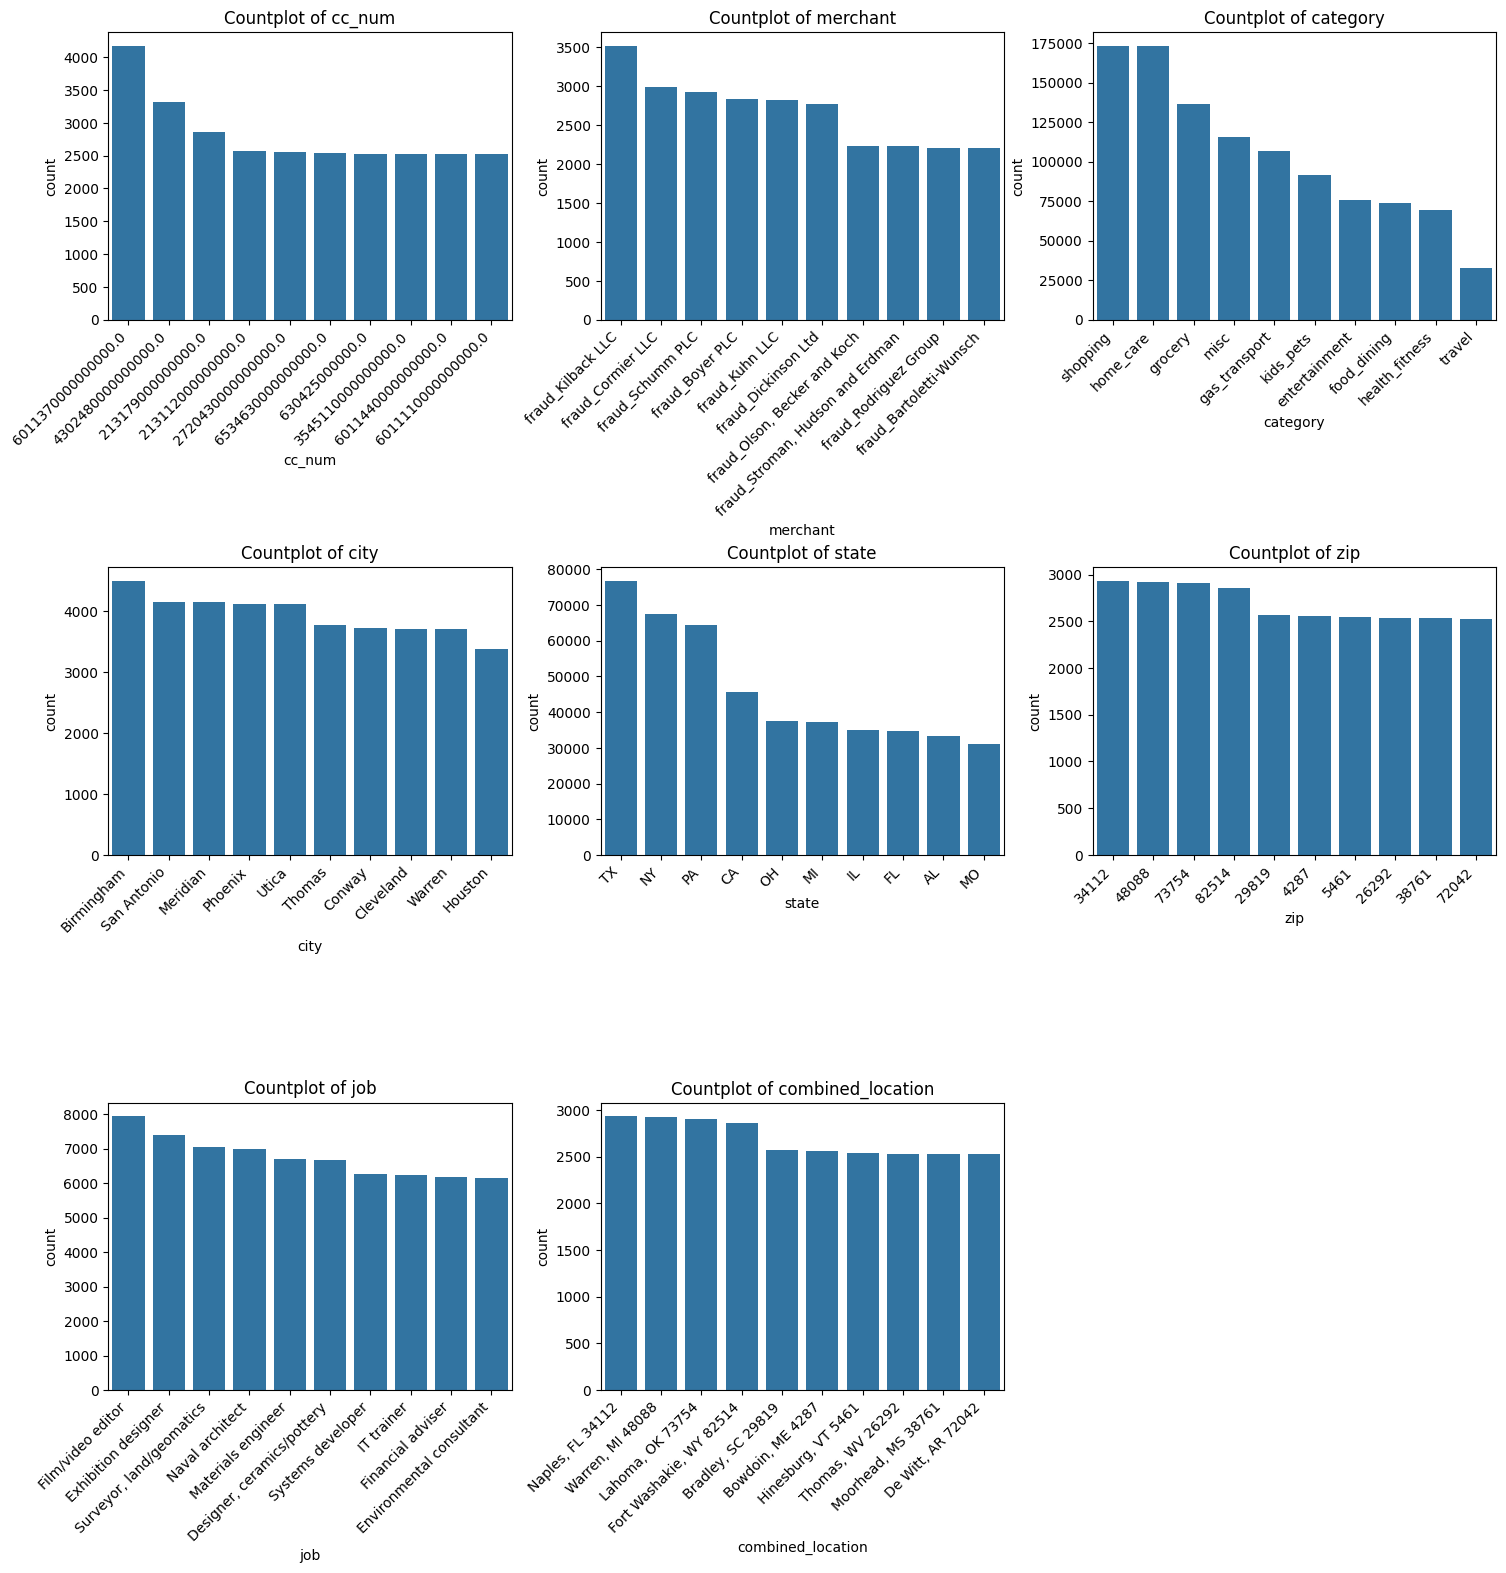

In [25]:
#EDA for categorical
plt.figure(figsize=(15, 30))  # Increased figure height for more subplots
for i, feature in enumerate(categorical_features):
    plt.subplot(6, 3, i + 1)  
    sns.countplot(x=feature, data=a, order=a[feature].value_counts().index[:10]) # Corrected method name and added slicing for top 10
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(pad=0.5) # Added padding to prevent overlapping labels
plt.show()

1. Some features appear to provide potentially useful information for fraud detection (e.g., merchant, category, job, and cc_num)
    a. merchant: Certain merchants might be more prone to fraudulent transactions. This feature could be useful, but you'll need to handle its high cardinality (e.g., grouping less frequent merchants).
    b. Fraudulent transactions might be more common in certain categories (e.g., electronics, jewelry). This feature is likely to be informative.
    c. city : Certain cities might have higher rates of fraud.
    d. job : Certain job types might be more susceptible to fraud
3. Address High Cardinality: For cc_num, merchant, and job, and categories


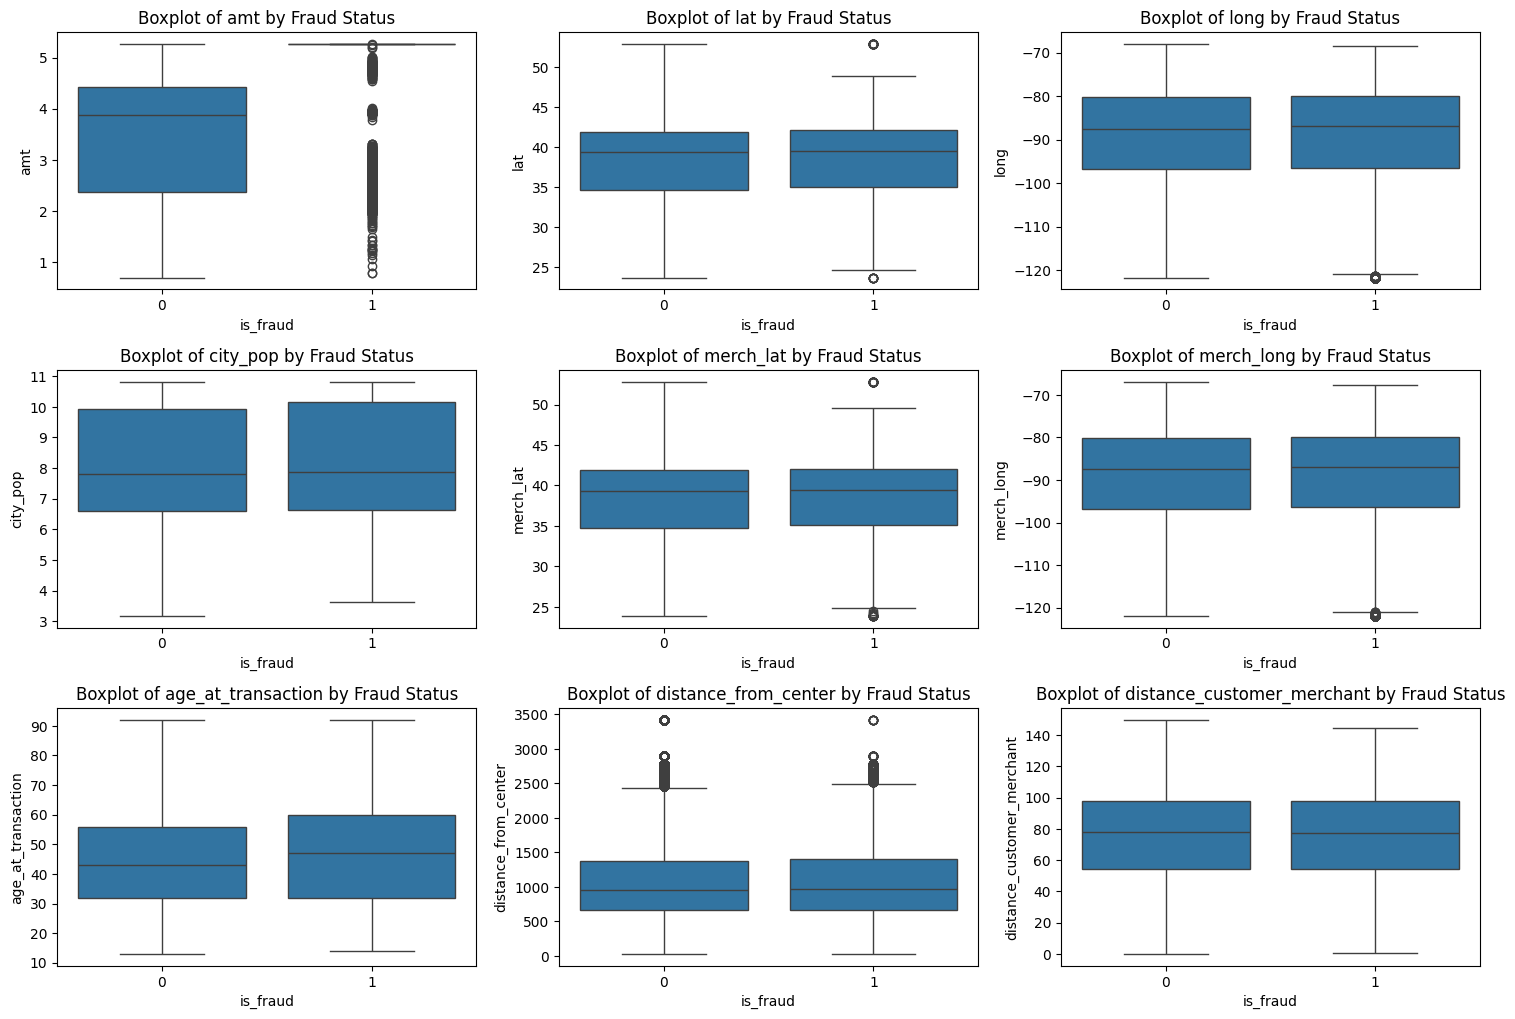

In [27]:
#EDA multivariat numerical and is_fraud (target)
plt.figure(figsize=(15, 20))  
num_features = len(numerical_features)
 
for i, feature in enumerate(numerical_features):
    plt.subplot(6, 3, i + 1) 
    sns.boxplot(x='is_fraud', y=feature, data=a)
    plt.title(f'Boxplot of {feature} by Fraud Status')

plt.tight_layout()  
plt.show()

1. amt: Fraudulent transactions exhibit a noticeably higher median and a much wider spread (IQR) compared to non-fraudulent transactions. This strongly suggests that transaction amount is a powerful indicator of potential fraud. Larger transactions are significantly more likely to be fraudulent.
2. distance_from_center:Fraudulent transactions appear to have a wider range of distances from the center and possibly a slightly higher median distance.
3. distance_customer_merchant:This is a key feature. Fraudulent transactions show a significantly wider range of distances between the customer and the merchant, with a higher likelihood of much larger distances.

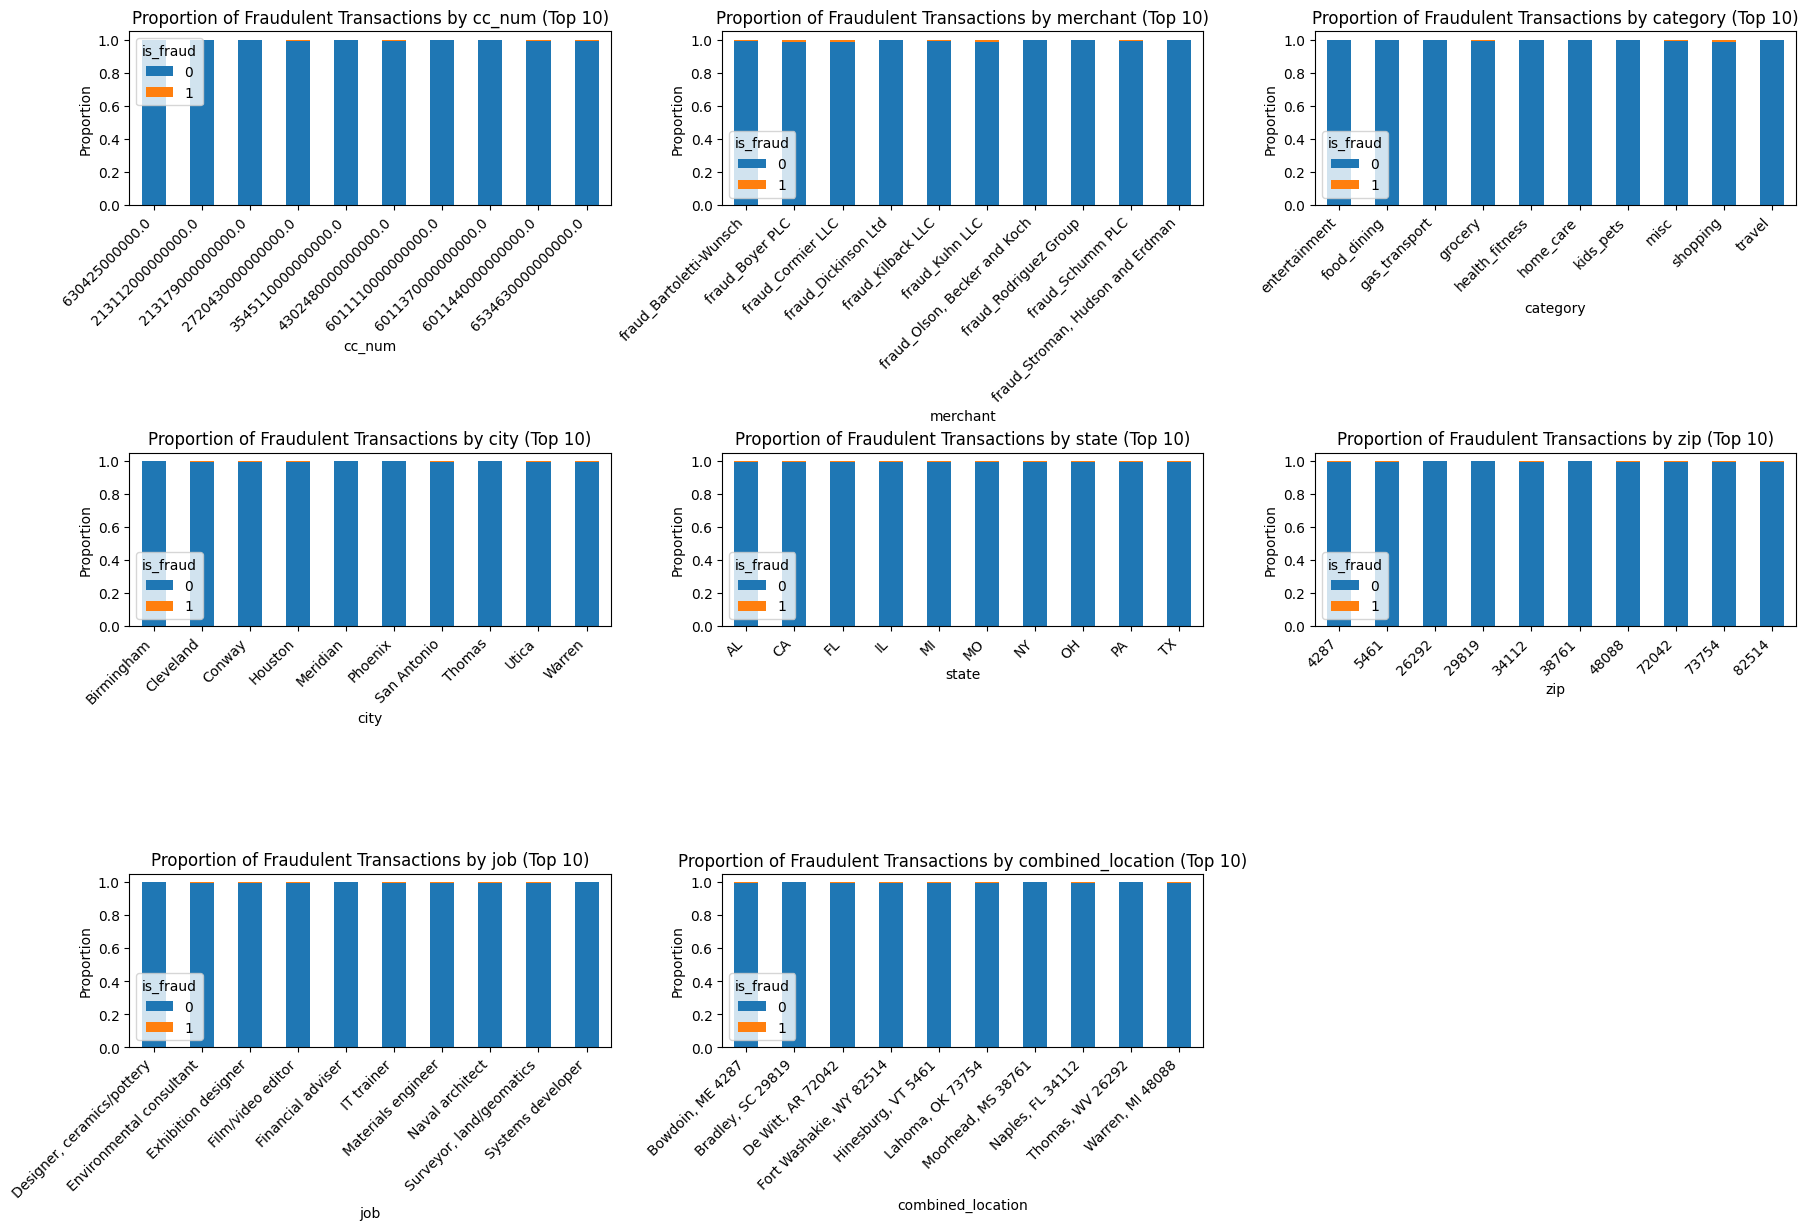

In [28]:
#EDA multivariat categorical and is_fraud
#Stacked barplot categorical features and is_fraud as a target
plt.figure(figsize=(18, 40))  

for i, feature in enumerate(categorical_features):
    plt.subplot(10, 3, i + 1)  

    # Get the top 10 categories
    top_10 = a[feature].value_counts().nlargest(10).index

    # Filter the DataFrame to include only the top 10 categories
    a_top10 = a[a[feature].isin(top_10)]

    # Calculate proportions for the top 10
    proportions = a_top10.groupby(feature)['is_fraud'].value_counts(normalize=True).unstack(fill_value=0)

    # Plot stacked bar chart
    proportions.plot(kind='bar', stacked=True, ax=plt.gca())  

    plt.title(f'Proportion of Fraudulent Transactions by {feature} (Top 10)')  
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Proportion')  
    plt.tight_layout(pad=0.5)

plt.show()

1. Merchant: Different merchants exhibit varying fraud proportions. Some merchants have a higher proportion of fraudulent transactions, suggesting they might be more vulnerable or targeted.
2. Categories: Categories like entertainment, gas transport, grocery and shopping might show a slightly higher proportion of fraudulent transactions, although the differences are not dramatic.
3. Job: Specific job categories, such as "Designer, ceramics/pottery," "Environmental consultant," and "Film/video editor," show a disproportionately high percentage of fraudulent transactions.
4. City:Certain cities, like Birmingham and Conway, exhibit a higher proportion of fraudulent transactions.Geographic location plays a role, and these cities might be hotspots for fraud. Consider local factors contributing to fraud in these cities.

In [29]:
#T-test, alpha=5%
from scipy.stats import ttest_ind

def prepare_data_for_ttest(df, numerical_feature, fraud_column='is_fraud'):
    """Prepares data for a t-test by separating into two groups.

    Args:
        df: Pandas DataFrame containing the data.
        numerical_feature: Name of the numerical column to compare.
        fraud_column: Name of the column indicating fraud (default: 'is_fraud').

    Returns:
        A tuple containing two Pandas Series: (fraudulent_group, non_fraudulent_group).
        Returns None if the numerical_feature or fraud_column is not in the DataFrame.
    """

    if numerical_feature not in df.columns or fraud_column not in df.columns:
        print("Error: The specified numerical feature or fraud column is not in the DataFrame.")
        return None

    fraudulent_group = df[df[fraud_column] == 1][numerical_feature]  # Assuming 1 indicates fraud
    non_fraudulent_group = df[df[fraud_column] == 0][numerical_feature]  # Assuming 0 indicates no fraud

    return fraudulent_group, non_fraudulent_group

numerical_feature_to_test = 'amt'  # Example: transaction amount
fraudulent_data, non_fraudulent_data = prepare_data_for_ttest(a, numerical_feature_to_test)

if fraudulent_data is not None:
    print("Fraudulent Data:")
    print(fraudulent_data.describe())  # Get descriptive statistics
    print("\nNon-Fraudulent Data:")
    print(non_fraudulent_data.describe())  # Get descriptive statistics


Fraudulent Data:
count    6006.000000
mean        4.691533
std         1.086836
min         0.779325
25%         5.268708
50%         5.268708
75%         5.268708
max         5.268708
Name: amt, dtype: float64

Non-Fraudulent Data:
count    1.042569e+06
mean     3.496060e+00
std      1.231781e+00
min      6.931472e-01
25%      2.360854e+00
50%      3.875774e+00
75%      4.424487e+00
max      5.268708e+00
Name: amt, dtype: float64


In [30]:
#Performing T-test, alpha5%

if fraudulent_data is not None:
    # Perform the independent samples t-test
    t_statistic, p_value = ttest_ind(fraudulent_data, non_fraudulent_data, equal_var=False, nan_policy='omit')  # equal_var=False for unequal variances

    print(f"\nT-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"The difference in means for '{numerical_feature_to_test}' between fraudulent and non-fraudulent transactions is statistically significant.")
    else:
        print(f"There is no statistically significant difference in means for '{numerical_feature_to_test}' between fraudulent and non-fraudulent transactions.")


T-statistic: 84.93126467262428
P-value: 0.0
The difference in means for 'amt' between fraudulent and non-fraudulent transactions is statistically significant.


This means the difference in transaction amounts between fraudulent and non-fraudulent transactions is statistically significant. It's not just due to random chance.

In [31]:
datetime_features = ['transaction_hour', 'year_month', 'day_of_week', 'dob_year', 'dob_month', 'dob_day', 'unix_time_year', 'unix_time_month', 'unix_time_day', 'unix_time_hour', 'date', 'time']
# 1. Data Types
print("\nData Types of Date/Time Features:")
print(a[datetime_features].dtypes)


Data Types of Date/Time Features:
transaction_hour        int32
year_month          period[M]
day_of_week             int32
dob_year                int32
dob_month               int32
dob_day                 int32
unix_time_year          int32
unix_time_month         int32
unix_time_day           int32
unix_time_hour          int32
date                   object
time                   object
dtype: object


In [32]:
# 2. Basic Statistics (Numerical Date/Time Features)
numerical_datetime = a[datetime_features].select_dtypes(include=['number'])  # Select numerical columns
if not numerical_datetime.empty:
    print("\nBasic Statistics for Numerical Date/Time Features:")
    print(numerical_datetime.describe())


Basic Statistics for Numerical Date/Time Features:
       transaction_hour   day_of_week      dob_year     dob_month  \
count      1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean       1.280077e+01  3.135594e+00  1.973229e+03  6.527349e+00   
std        6.816861e+00  2.200499e+00  1.736428e+01  3.397932e+00   
min        0.000000e+00  0.000000e+00  1.924000e+03  1.000000e+00   
25%        7.000000e+00  1.000000e+00  1.962000e+03  4.000000e+00   
50%        1.400000e+01  3.000000e+00  1.975000e+03  7.000000e+00   
75%        1.900000e+01  5.000000e+00  1.987000e+03  9.000000e+00   
max        2.300000e+01  6.000000e+00  2.005000e+03  1.200000e+01   

            dob_day  unix_time_year  unix_time_month  unix_time_day  \
count  1.048575e+06    1.048575e+06     1.048575e+06   1.048575e+06   
mean   1.565726e+01    2.012118e+03     6.514797e+00   1.553195e+01   
std    8.888762e+00    3.226005e-01     3.668344e+00   8.904672e+00   
min    1.000000e+00    2.012000e+03     1.

In [33]:
# 3. Unique Values and Frequencies (Categorical Date/Time Features)
categorical_datetime = a[datetime_features].select_dtypes(exclude=['number']) # Select non-numerical columns
if not categorical_datetime.empty:
    print("\nUnique Values and Frequencies for Categorical Date/Time Features:")
    for col in categorical_datetime:
        print(f"\nColumn: {col}")
        print(a[col].value_counts())


Unique Values and Frequencies for Categorical Date/Time Features:

Column: year_month
year_month
2019-12    141060
2019-08     87359
2019-07     86596
2019-06     86064
2019-05     72532
2019-03     70939
2019-09     70652
2019-11     70421
2019-10     68758
2019-04     68078
2019-01     52525
2020-01     52202
2019-02     49866
2020-02     47791
2020-03     23732
Freq: M, Name: count, dtype: int64

Column: date
date
2019-12-08    6428
2019-12-15    6425
2019-12-22    6325
2019-12-29    6320
2019-12-01    6283
              ... 
2019-01-30    1109
2020-01-07    1107
2019-02-27    1106
2020-02-18    1100
2020-01-21    1073
Name: count, Length: 434, dtype: int64

Column: time
time
22:59:00    973
13:15:00    964
22:36:00    963
23:45:00    962
14:27:00    960
           ... 
11:03:00    514
00:44:00    511
04:53:00    507
10:24:00    505
04:00:00    502
Name: count, Length: 1440, dtype: int64


In [34]:
# 4. Date/Time Range (If 'date' or 'time' exists, or a combined datetime column)
if 'date' in a.columns and 'time' in a.columns:
    try:
        a['transaction_datetime'] = pd.to_datetime(a['date'] + ' ' + a['time'])
        print("\nDate Range:")
        print(a['transaction_datetime'].min())
        print(a['transaction_datetime'].max())
        a = a.drop(columns=['transaction_datetime']) # Drop the column we created for exploration
    except:
        print("Could not combine 'date' and 'time' into a datetime object for range exploration.")
elif 'date' in a.columns:
    try:
        a['date'] = pd.to_datetime(a['date'])
        print("\nDate Range:")
        print(a['date'].min())
        print(a['date'].max())
    except:
        print("Could not convert 'date' to datetime object for range exploration.")


Could not combine 'date' and 'time' into a datetime object for range exploration.


In [35]:
# Convert 'trans_date_trans_time' to datetime objects
suspicious_1['trans_date_trans_time'] = pd.to_datetime(suspicious_1['trans_date_trans_time'])

# Sort by card, amount, merchant, and time
suspicious_1 = suspicious_1.sort_values(['cc_num', 'amt', 'merchant', 'trans_date_trans_time'])

# Calculate the time difference
suspicious_1['time_diff'] = suspicious_1.groupby(['cc_num', 'amt', 'merchant'])['trans_date_trans_time'].diff()

print(suspicious_1)

# Examine the time differences (especially those close to 0)
print(suspicious_1['time_diff'].describe())

C:\Users\Dwi Fitria\AppData\Local\Temp\ipykernel_4940\205147361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious_1['trans_date_trans_time'] = pd.to_datetime(suspicious_1['trans_date_trans_time'])


        Unnamed: 0 trans_date_trans_time        cc_num  \
229064      229064   2019-04-26 01:09:00  6.041621e+10   
596583      596583   2019-09-09 21:27:00  6.041621e+10   
731200      731200   2019-11-09 00:28:00  5.018830e+11   
785559      785559   2019-12-01 08:41:00  5.018830e+11   
265604      265604   2019-05-12 04:25:00  5.038480e+11   
...            ...                   ...           ...   
528782      528782   2019-08-16 00:05:00  4.906630e+18   
286369      286369   2019-05-20 19:25:00  4.956830e+18   
454829      454829   2019-07-20 23:07:00  4.956830e+18   
582142      582142   2019-09-03 15:46:00  4.980320e+18   
643115      643115   2019-09-30 14:21:00  4.980320e+18   

                                   merchant       category    amt    first  \
229064                fraud_Kuphal-Predovic           misc   1.49     Mary   
596583                fraud_Kuphal-Predovic           misc   1.49     Mary   
731200     fraud_Swaniawski, Lowe and Robel       shopping   7.58  Me

The min value of "0 days 00:07:00" tells us that there are transactions happening within 7 minutes of each other with the same card, amount, and merchant. This is highly suspicious and warrants further investigation. The other percentiles give you a sense of the overall distribution.

In [36]:
# Convert 'trans_date_trans_time' to datetime objects (if not done already)
suspicious_1['trans_date_trans_time'] = pd.to_datetime(suspicious_1['trans_date_trans_time'])

# Sort (as before)
suspicious_1 = suspicious_1.sort_values(['cc_num', 'amt', 'merchant', 'trans_date_trans_time'])

# Calculate time difference (as before)
suspicious_1['time_diff'] = suspicious_1.groupby(['cc_num', 'amt', 'merchant'])['trans_date_trans_time'].diff()

# Set a time threshold (adjust as needed)
time_threshold = pd.Timedelta('30 minutes')  # Example: 30 minutes

# Create the 'is_very_fast' flag
suspicious_1['is_very_fast'] = suspicious_1['time_diff'] < time_threshold

# Now you can analyze the 'is_very_fast' column
print(suspicious_1[suspicious_1['is_very_fast'] == True])  # Show only very fast transactions
print(suspicious_1['is_very_fast'].value_counts())  # Count True/False values


        Unnamed: 0 trans_date_trans_time        cc_num  \
907358      907358   2019-12-28 16:12:00  4.170690e+15   

                      merchant  category   amt   first  last gender  \
907358  fraud_Schmidt and Sons  shopping  1.86  Samuel  Frey      M   

                          street  ... city_pop          job        dob  \
907358  830 Myers Plaza Apt. 384  ...   116001  Media buyer  5/10/1993   

                               trans_num   unix_time  merch_lat merch_long  \
907358  b81aa8661547a4eacaa40c4d53620244  1356711126  36.463805 -97.609183   

       is_fraud       time_diff  is_very_fast  
907358        0 0 days 00:07:00          True  

[1 rows x 25 columns]
is_very_fast
False    639
True       1
Name: count, dtype: int64


we've successfully identified one transaction that was flagged as is_very_fast (meaning it occurred within your specified time threshold of another transaction with the same card, amount, and merchant).

639 transactions were not flagged as "very fast" (i.e., the time difference was greater than your threshold or it was the first transaction in a group). 1 transaction was flagged as "very fast" (the one we saw the details of earlier).

The details of the single transaction show that it occurred on 2019-12-28 at 16:12:00. The time_diff is 7 minutes (0 days 00:07:00).  This means that this transaction occurred 7 minutes after a previous transaction with the same card number, amount, and location.  Because this time difference is less than your threshold (presumably), it's marked as is_very_fast = True.

The interesting part from this information is the same merchant but different location merchant, the customer buy via online. 
we need to investigate more same merchant but different location


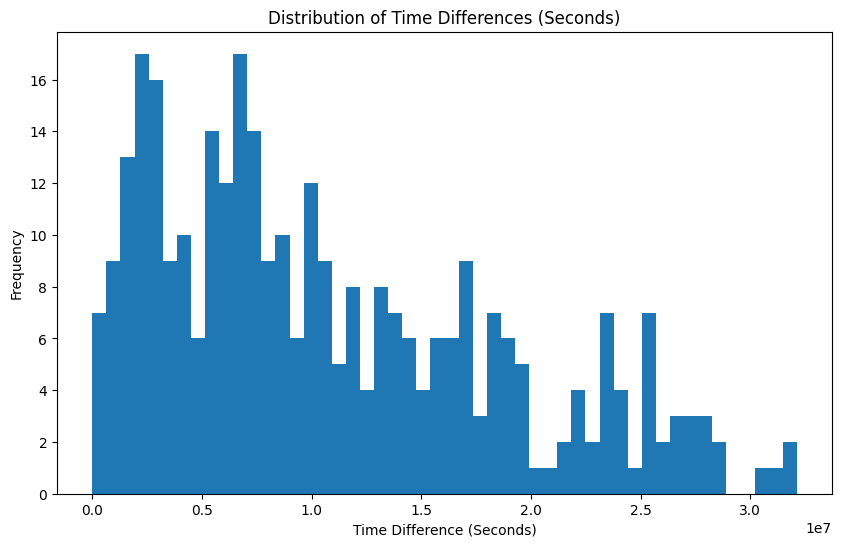

count                           320
mean       125 days 07:35:31.312500
std      90 days 17:26:23.070739832
min                 0 days 00:07:00
25%                51 days 01:48:00
50%               100 days 02:49:00
75%               187 days 17:50:30
max               371 days 18:03:00
Name: time_diff, dtype: object


In [37]:
# Visualize the time differences
plt.figure(figsize=(10, 6))
plt.hist(suspicious_1['time_diff'].dt.total_seconds().dropna(), bins=50)  # Handle NaN values
plt.title('Distribution of Time Differences (Seconds)')
plt.xlabel('Time Difference (Seconds)')
plt.ylabel('Frequency')
plt.show()

# Print some statistics
print(suspicious_1['time_diff'].describe())

In [38]:
# Group by card and aggregate
card_level_features = suspicious_1.groupby('cc_num').agg(
    num_very_fast_transactions=('is_very_fast', 'sum'),  # Number of True values
    avg_fast_transaction_amount=('amt', lambda x: x[suspicious_1['is_very_fast']].mean()), # Avg amount for fast trans
    # Add other aggregate features here
).reset_index()

print(card_level_features)

           cc_num  num_very_fast_transactions  avg_fast_transaction_amount
0    6.041621e+10                           0                          NaN
1    5.018830e+11                           0                          NaN
2    5.038480e+11                           0                          NaN
3    5.682790e+11                           0                          NaN
4    5.713140e+11                           0                          NaN
..            ...                         ...                          ...
236  4.861310e+18                           0                          NaN
237  4.890420e+18                           0                          NaN
238  4.906630e+18                           0                          NaN
239  4.956830e+18                           0                          NaN
240  4.980320e+18                           0                          NaN

[241 rows x 3 columns]


NaN (Not a Number) values in the avg_fast_transaction_amount column because, for most of your credit cards, there are no "very fast" transactions (transactions within your defined time threshold).  When we calculate the mean of an empty set (no "very fast" transaction amounts to average), the result is NaN.

In [39]:
# Group by card and aggregate (improved)
card_level_features = suspicious_1.groupby('cc_num').agg(
    num_very_fast_transactions=('is_very_fast', 'sum'),  # Number of True values
    avg_fast_transaction_amount=('amt', lambda x: x[suspicious_1['is_very_fast']].mean()) # Avg amount for fast trans
).reset_index()

# Fill NaN values with 0 (important!)
card_level_features['avg_fast_transaction_amount'] = card_level_features['avg_fast_transaction_amount'].fillna(0)

print(card_level_features)

           cc_num  num_very_fast_transactions  avg_fast_transaction_amount
0    6.041621e+10                           0                          0.0
1    5.018830e+11                           0                          0.0
2    5.038480e+11                           0                          0.0
3    5.682790e+11                           0                          0.0
4    5.713140e+11                           0                          0.0
..            ...                         ...                          ...
236  4.861310e+18                           0                          0.0
237  4.890420e+18                           0                          0.0
238  4.906630e+18                           0                          0.0
239  4.956830e+18                           0                          0.0
240  4.980320e+18                           0                          0.0

[241 rows x 3 columns]


Why All Zeros?

No "Very Fast" Transactions: As we discussed earlier, the avg_fast_transaction_amount is calculated only for those transactions that were flagged as is_very_fast (i.e., transactions occurring within your defined time threshold of another transaction with the same card, amount, and merchant).

Most Cards Have No "Very Fast" Transactions: The output we're showing indicates that most (if not all) of your credit cards do not have any transactions that meet your "very fast" criteria.  This is why, after we fill the NaN values with 0, the entire column becomes 0.  The NaN values were there because there were no "very fast" transactions to average in the first place.

In [40]:
#Same Card, Amount, Location (Different Time):  Might be a repeated transaction.
suspicious_2 = a[a.duplicated(subset=['cc_num', 'amt', 'merch_lat', 'merch_long'], keep=False)]
print("Suspicious - Same Card, Amount, Location:")
print(suspicious_2)
print(f"Count: {len(suspicious_2)}")

Suspicious - Same Card, Amount, Location:
         Unnamed: 0 trans_date_trans_time        cc_num  \
1784           1784   2019-01-01 18:51:00  3.415460e+14   
2006           2006   2019-01-01 20:40:00  3.415460e+14   
3110           3110   2019-01-02 16:42:00  4.742880e+18   
3127           3127   2019-01-02 16:59:00  3.415460e+14   
3181           3181   2019-01-02 18:03:00  3.415460e+14   
...             ...                   ...           ...   
1037670     1037670   2020-03-06 12:13:00  4.742880e+18   
1041979     1041979   2020-03-08 13:31:00  3.415460e+14   
1042288     1042288   2020-03-08 15:50:00  4.742880e+18   
1045863     1045863   2020-03-09 18:58:00  4.742880e+18   
1046834     1046834   2020-03-10 01:20:00  3.415460e+14   

                                      merchant       category       amt  \
1784                         fraud_Boyer-Haley         travel  5.268708   
2006                         fraud_Berge-Hills      kids_pets  3.928093   
3110                    

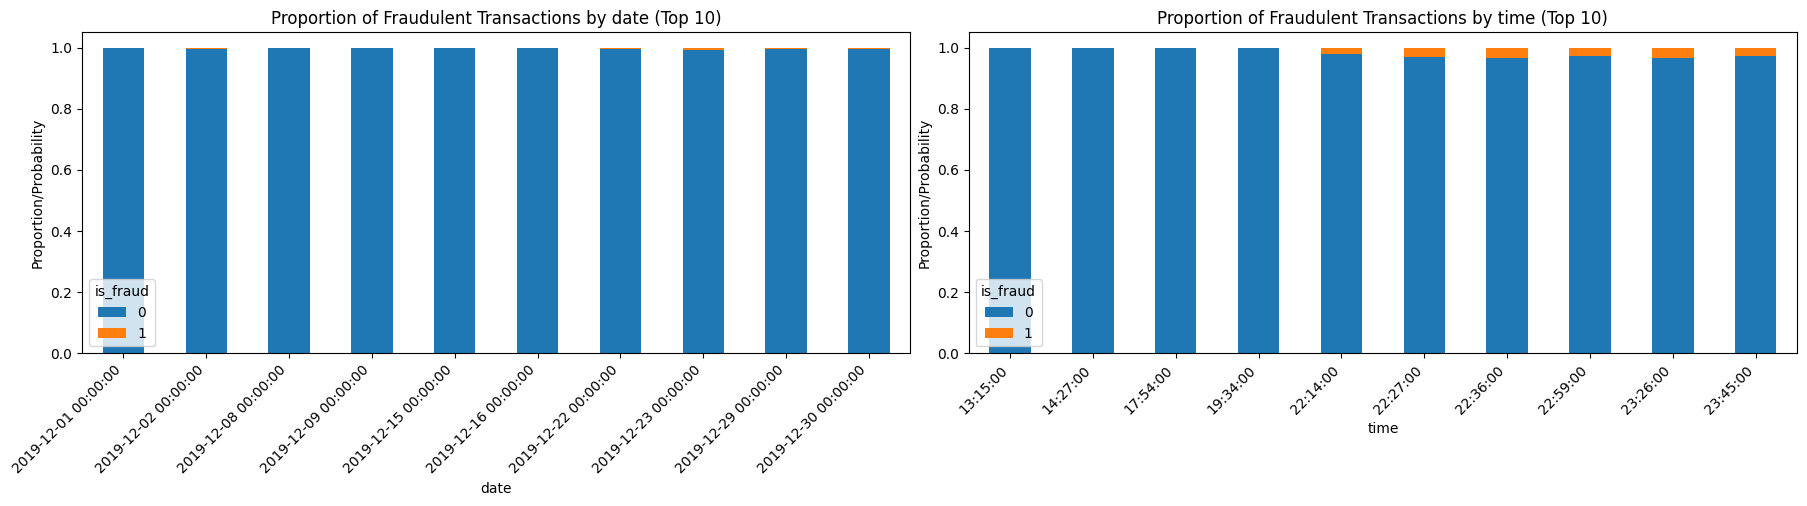

In [41]:

import math

datetime_features = ['date', 'time']

# Convert date/time features to appropriate types if needed (especially 'date' and 'time' to datetime)
for col in datetime_features:
    if col in a.columns:
        if a[col].dtype == 'object':
            try:
                a[col] = pd.to_datetime(a[col])
            except:
                pass

n_features = len(datetime_features)
n_cols = 2 
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, feature in enumerate(datetime_features):
    if feature in a.columns:
        plt.subplot(n_rows, n_cols, i + 1)

        # Handle different data types appropriately
        if a[feature].dtype == 'object' or a[feature].dtype == 'datetime64[ns]':  # Categorical or datetime
            top_n = min(10, a[feature].nunique())
            top_categories = a[feature].value_counts().nlargest(top_n).index
            a_top = a[a[feature].isin(top_categories)]

            proportions = a_top.groupby(feature)['is_fraud'].value_counts(normalize=True).unstack(fill_value=0)
            proportions.plot(kind='bar', stacked=True, ax=plt.gca())

            plt.title(f'Proportion of Fraudulent Transactions by {feature} (Top {top_n})')
            plt.xticks(rotation=45, ha='right')

        elif a[feature].dtype in ['int64', 'float64']:  # Numerical features (histograms are usually better)
            sns.histplot(a[feature], hue=a['is_fraud'], stat="probability", common_norm=False, ax=plt.gca()) # Plot histogram with is_fraud as hue
            plt.title(f'Distribution of {feature} by Fraud Status')
            plt.xlabel(feature)
            plt.ylabel('Probability')

        plt.ylabel('Proportion/Probability')  # Common y-axis label
        plt.tight_layout(pad=0.5)

plt.show()

1. The chart shows a relatively consistent proportion of fraudulent transactions (orange) across the displayed dates in December.
2. There appears to be a slightly higher proportion of fraudulent transactions in the later hours of the day (e.g., 22:00 - 23:00 range), although the differences are subtle.

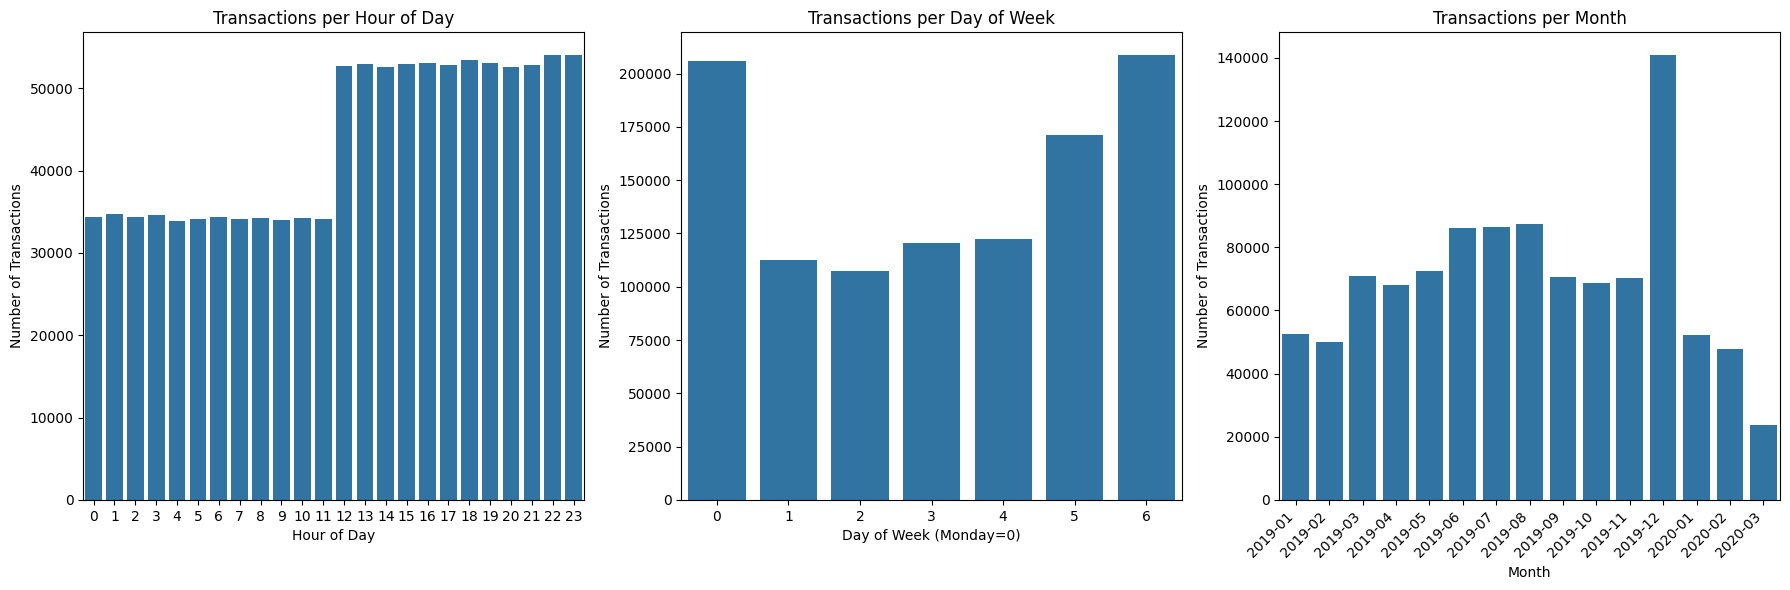

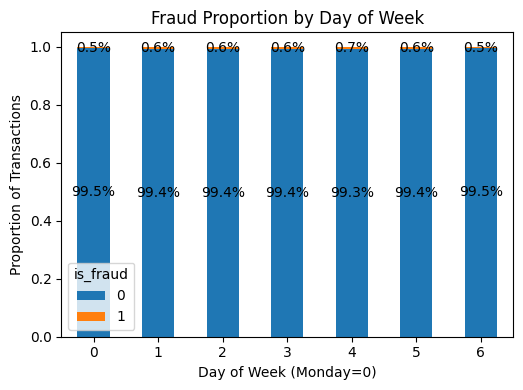

In [42]:
# 1. Distribution of Transactions Over Time
plt.figure(figsize=(18, 6))

# a. Transactions per Hour of Day
plt.subplot(1, 3, 1)
sns.countplot(x='transaction_hour', data=a) 
plt.title('Transactions per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')

# b. Transactions per Day of Week
plt.subplot(1, 3, 2)
sns.countplot(x='day_of_week', data=a)
plt.title('Transactions per Day of Week')
plt.xlabel('Day of Week (Monday=0)')  
plt.ylabel('Number of Transactions')

# c. Transactions per Month
plt.subplot(1, 3, 3)
sns.countplot(x=a['year_month'].astype(str), data=a) # Convert Period to String for plotting
plt.title('Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  


plt.tight_layout()
plt.show()


# 2. Fraud Proportion by Day of Week
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1) 
# Calculate proportions of fraud by day of week
fraud_by_day = a.groupby('day_of_week')['is_fraud'].value_counts(normalize=True).unstack(fill_value=0)

# Plotting the stacked bar chart for fraud proportion by day of week
fraud_by_day.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Fraud Proportion by Day of Week')
plt.xlabel('Day of Week (Monday=0)')
plt.ylabel('Proportion of Transactions')
plt.xticks(rotation=0)  

# Add percentage labels on the bars
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.gca().annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center')
plt.tight_layout()
plt.show()

1. The observed patterns in hourly and daily transaction distributions are consistent with typical retail behavior, such as after work hours, after lunch, or weekend.
2. Impact of External Factors: The monthly chart hints at the potential impact of external factors like holidays (December spike) and possibly the pandemic (March 2020 spike).
3. There's a subtle increase in the proportion of fraudulent transactions around the middle of the week (Friday, Wednesday, Thursday). However, this increase is very small and might not be statistically significant.

In [43]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 39 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Unnamed: 0                  1048575 non-null  int64         
 1   trans_date_trans_time       1048575 non-null  datetime64[ns]
 2   cc_num                      1048575 non-null  float64       
 3   merchant                    1048575 non-null  object        
 4   category                    1048575 non-null  object        
 5   amt                         1048575 non-null  float64       
 6   first                       1048575 non-null  object        
 7   last                        1048575 non-null  object        
 8   gender                      1048575 non-null  object        
 9   street                      1048575 non-null  object        
 10  city                        1048575 non-null  object        
 11  state                   

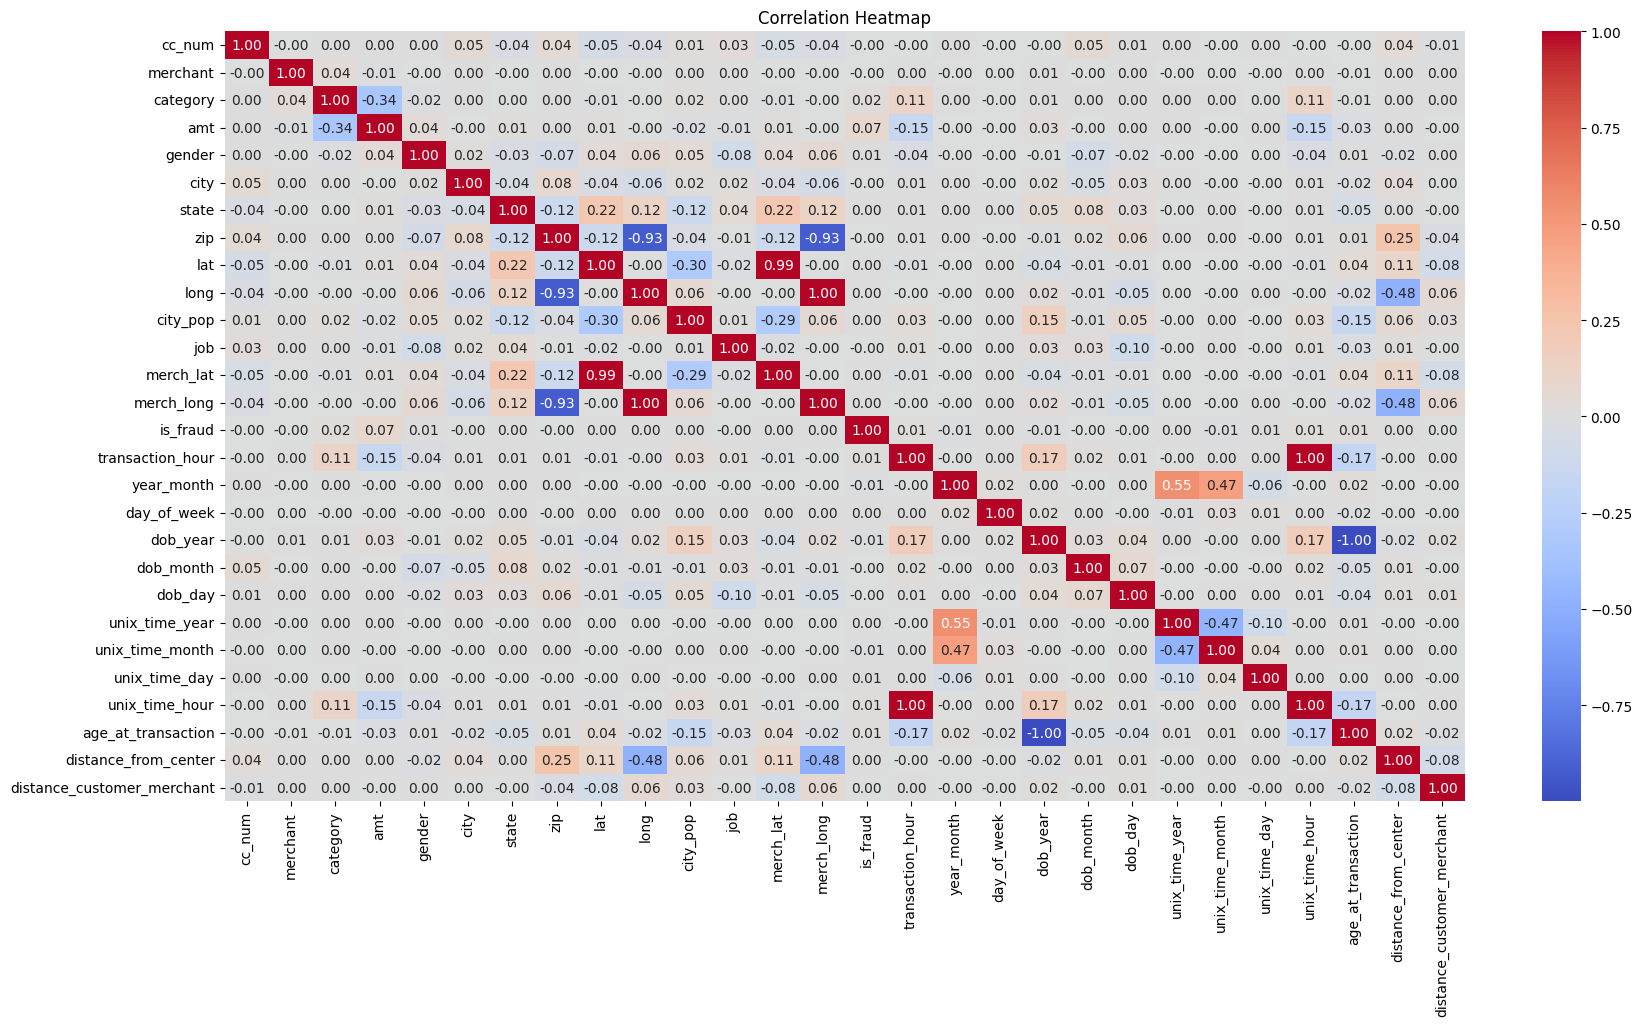


Correlation with 'is_fraud':
is_fraud                      1.000000
amt                           0.073091
category                      0.022448
transaction_hour              0.012416
unix_time_hour                0.012416
age_at_transaction            0.010748
gender                        0.007936
unix_time_day                 0.005579
unix_time_year                0.003029
merch_long                    0.002641
long                          0.002607
city_pop                      0.001421
day_of_week                   0.001399
distance_from_center          0.001291
lat                           0.000769
merch_lat                     0.000610
state                         0.000309
distance_customer_merchant    0.000108
city                         -0.000130
job                          -0.000660
merchant                     -0.000762
dob_day                      -0.001048
zip                          -0.001844
cc_num                       -0.002301
dob_month                    -0.00

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Drop Unnecessary Columns
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'dob',  # Personal info
                   'trans_num', 'unix_time', 'date', 'time', 'combined_location']  # High cardinality or redundant
a = a.drop(columns=columns_to_drop)

# 2. Convert 'year_month' to Numerical (If Needed)
a['year_month'] = a['year_month'].dt.to_timestamp().astype(np.int64) // 10**9 # Convert Period to timestamp then to numerical

# 3. Handle Categorical Features with Label Encoding
categorical_features = a.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    le = LabelEncoder()
    a[feature] = le.fit_transform(a[feature])

# 4. Correlation Heatmap
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
correlation_matrix = a.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm') # Set annot=True to display correlation values
plt.title('Correlation Heatmap')
plt.show()

# 5. (Optional) Display Correlations with Target Variable
target_correlation = correlation_matrix['is_fraud'].sort_values(ascending=False)
print("\nCorrelation with 'is_fraud':")
print(target_correlation)

# 6. (Optional) Display Correlations with Target Variable (Absolute Values)
target_correlation_abs = abs(target_correlation).sort_values(ascending=False)
print("\nAbsolute Correlation with 'is_fraud':")
print(target_correlation_abs)

1. amt (Transaction Amount): There's a noticeable positive correlation (around 0.07) with is_fraud. While not very strong, it suggests that higher transaction amounts are somewhat more likely to be associated with fraud.
2. lat and merch_lat (Latitude Features) & long and merch_long (Longitude Features): There's a very strong positive correlation (close to 0.99-1.00) between customer latitude (lat) and merchant latitude (merch_lat), and similarly for longitude (long and merch_long). we don't need to use both lat and merch_lat (or long and merch_long) in your model, as they are conveying very similar information. 
3. category: A positive correlation (around 0.02) is visible, albeit weak. This implies that certain transaction categories might have a slightly higher propensity for fraud. we might need to examine specific categories to understand which ones contribute most to this correlation.

In [45]:
#Scaller
scaler = StandardScaler()
numerical_features_scale = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age_at_transaction', 'distance_from_center', 'distance_customer_merchant', 'transaction_hour', 'day_of_week', 'dob_year', 'dob_month', 'dob_day', 'unix_time_year', 'unix_time_month', 'unix_time_day', 'unix_time_hour', 'year_month'] # Include all numerical features after feature engineering and date extractions
a[numerical_features_scale] = scaler.fit_transform(a[numerical_features_scale])
print("Scaled numerical features.")

Scaled numerical features.


In [47]:
#Data Splitting

X = a.drop('is_fraud', axis=1)
y = a['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
print("Data split into training and testing sets (80/20, stratified).")

Data split into training and testing sets (80/20, stratified).


In [50]:
#Model Training and Evaluation - Function for Reusability

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))


In [54]:
# Train and Evaluate Models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Logistic Regression
lr_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced') # balanced class weight
lr_model.fit(X_train, y_train) 
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")


# Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced') 
rf_model.fit(X_train, y_train) 
evaluate_model(rf_model, X_test, y_test, "Random Forest")


# Gradient Boosting Machine 
gb_model = GradientBoostingClassifier(random_state=42) 
gb_model.fit(X_train, y_train) 
evaluate_model(gb_model, X_test, y_test, "Gradient Boosting Classifier")


--- Logistic Regression ---
Confusion Matrix:
[[208514      0]
 [  1201      0]]

Classification Report:


c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dwi Fitria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    208514
           1       0.00      0.00      0.00      1201

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715

AUC-ROC Score: 0.5077418072040434

--- Random Forest ---
Confusion Matrix:
[[208497     17]
 [   433    768]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208514
           1       0.98      0.64      0.77      1201

    accuracy                           1.00    209715
   macro avg       0.99      0.82      0.89    209715
weighted avg       1.00      1.00      1.00    209715

AUC-ROC Score: 0.981832311888406

--- Gradient Boosting Classifier ---
Confusion Matrix:
[[208382    132]
 [   733    468]]

Classification Report:
              precision    recall  f1-score   support

         

Random Forest is the best performing model among these three based on recall and F1-score for the fraud class. It offers a good balance between precision and recall.
Logistic Regression is not effective for fraud detection in this configuration.
Gradient Boosting shows a high AUC-ROC score, but its recall for fraud detection is lower than Random Forest at the default threshold.

In [ ]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid,
                           scoring='f1', 
                           cv=3, n_jobs=1, verbose=1) 

grid_search.fit(X_train, y_train) 

best_rf_model = grid_search.best_estimator_
print("\nBest Random Forest Model from Grid Search:")
print(best_rf_model)
evaluate_model(best_rf_model, X_test, y_test, "Best Random Forest (Grid Search)")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
